# 代码复现

In [1]:
hello_rules = '''
say_hello = name hello
names = name names | name
name = Jonh|Mike|老梁|老刘
hello = 你好|您来啦|快请进
tail = 呀|！
'''

In [2]:
import random

In [3]:
def name():
    return random.choice('Jonh|Mike|老梁'.split('|'))

def hello():
    return random.choice('你好|您来啦|快请进'.split('|'))

def say_hello():
    return name()+' '+hello()

In [4]:
say_hello()

'老梁 快请进'

In [5]:
stmt_split = '='
or_split = '|'
rules = dict()
for line in hello_rules.split('\n'):
    if not line: continue
    
    stmt, expr = line.split(stmt_split)
    
    rules[stmt.strip()] = expr.split(or_split)

In [6]:
rules

{'say_hello': [' name hello'],
 'names': [' name names ', ' name'],
 'name': [' Jonh', 'Mike', '老梁', '老刘'],
 'hello': [' 你好', '您来啦', '快请进'],
 'tail': [' 呀', '！']}

In [7]:
def generate(grammer_rule, target):
    if target in grammer_rule:
        candidates = grammer_rule[target]
        candidate = random.choice(candidates).strip()
        candidate = candidate.split(' ')
        return ' '.join(generate(grammer_rule, target = c.strip()) for c in candidate if c != 'null')
    else: 
        return target

In [8]:
generate(rules, 'say_hello')

'Mike 快请进'

In [9]:
def get_generation_by_gram(grammer_str, target, stmt_split='=', expr_split='|'):
    rules = dict()
    for line in grammer_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.strip().split(expr_split)
    return generate(rules, target)

In [10]:
get_generation_by_gram(hello_rules, 'say_hello')

'Mike 快请进'

In [11]:
hello_rules.split('\n')

['',
 'say_hello = name hello',
 'names = name names | name',
 'name = Jonh|Mike|老梁|老刘',
 'hello = 你好|您来啦|快请进',
 'tail = 呀|！',
 '']

In [12]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [13]:
get_generation_by_gram(simple_grammar, 'sentence', '=>')

'一个  篮球 看着 这个  篮球'

In [14]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [15]:
get_generation_by_gram(programming, 'stmt', '=>')

'info name 1 = student name 2'

In [16]:
corpus = r'C:\迅雷下载\article_9k.txt'

In [17]:
FILE = open(corpus, encoding='utf-8').read()

In [18]:
def generate_by_pro(text_corpus, length):
    return ''.join(random.sample(text_corpus,length))

In [19]:
generate_by_pro(FILE, 10)

'民成了瞩来于０个条继'

In [20]:
import jieba

In [21]:
max_lenght = 1000000
sub_file = FILE[:max_lenght]

In [22]:
def cut(string):
    return list(jieba.cut(string))

In [23]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Daddy\AppData\Local\Temp\jieba.cache
Loading model cost 0.736 seconds.
Prefix dict has been built succesfully.


In [24]:
len(TOKENS)

532454

In [25]:
import collections

In [26]:
% matplotlib inline

In [27]:
from collections import Counter
words_count  = Counter(TOKENS)

In [28]:
words_freq = [f for w, f in words_count.most_common()]

In [29]:
import matplotlib.pyplot as plt

In [30]:
import numpy as np

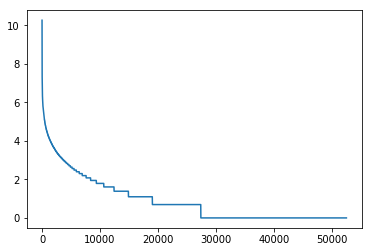

In [31]:
plt.plot(np.log(words_freq))

In [32]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [33]:
_2_gram_word_counts = Counter(_2_gram_words)

In [34]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [35]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
         return words_count.most_common()[-1][-1]

In [36]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
         return _2_gram_word_counts.most_common()[-1][-1]

In [37]:
def _2_gram_model(sentence):
    tokens = cut(sentence)
    
    probability = 1
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        pro = get_2_gram_count(word + next_word) / get_1_gram_count(next_word)
        
        probability *= pro
        
    return probability

In [38]:
_2_gram_model('前天早上吃晚饭的时候')

7.429922323539344e-07

# 编程作业

In [1]:
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 来一场 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

In [2]:
import random

In [3]:
def create_rules(rule_str, line_split='\n', stmt_split='=', expr_split='|'):
    rules = dict()
    for line in rule_str.split(line_split):
        if not line: continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] =[i.strip() for i in expr.split(expr_split)]
    return rules

In [4]:
rule_1 = create_rules(host)

In [5]:
def generate(rule_dummy, target):
    if target in rule_dummy:
        candidates = rule_dummy[target]
        candidate = random.choice(candidates)
        candidate = candidate.split(' ')
        return ''.join(generate(rule_dummy, c) for c in candidate)
    return ''.join(target)

In [6]:
generate(rule_1, 'host')

'女士,您好我是822号,请问你要玩一玩喝酒吗？'

In [7]:
location = r'C:\graduate\freshman1\nlp\train.txt'
FILE = open(location, encoding='utf-8').read()

In [8]:
FILE[:100]

'0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ++$++ Is  Disability  Insurance  Required  By  Law?\n1 '

In [9]:
import re

In [11]:
pattern = re.compile('[\u4e00-\u9fa5]+')

In [13]:
it = re.finditer(pattern,FILE, flags=0)

In [14]:
it

In [15]:
st = ''
for i in it:
    st += i.group()

In [16]:
import jieba

In [17]:
token = list(jieba.cut(st))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Daddy\AppData\Local\Temp\jieba.cache
Loading model cost 0.632 seconds.
Prefix dict has been built succesfully.


In [18]:
from collections import Counter

In [19]:
ct = Counter(token)

In [20]:
ct.most_common()[500]

('妻子', 12)

In [21]:
def get_1_word_count(word):
    if word in ct:
        return ct[word]
    return ct.most_common()[-1][1]

In [22]:
_2_gram_words = [token[i]+token[i+1] for i in range(len(token)-1)]
ct_2 = Counter(_2_gram_words)

In [23]:
def get_2_word_count(word):
    if word in _2_gram_words:
        return ct_2[word]
    return ct_2.most_common()[-1][1]

In [24]:
def n_gram_model(txt):
    probability = 1
    tokens = list(jieba.cut(txt))
    for i in range(len(tokens)-1):
        pr = get_2_word_count(tokens[i]+tokens[i+1])/get_1_word_count(tokens[i+1])
        probability *= pr
        
    return probability    

In [25]:
n_gram_model('哔哩哔哩干杯')

1.0

In [26]:
insurance = '''
question = 人称 问词 谓词 种类 保险吗？
人称 = 我|你
问词 = 需要|应该|如何
谓词 = 购买|缴纳|null
种类 = 商业|健康|医疗|汽车
'''

In [27]:
def create_rule(rule_str, line_split='\n', stmt_split='=', expr_split='|'):
    new_rule = dict()
    for line in rule_str.split(line_split):
        if not line: continue
        stmt, expr = line.split(stmt_split)
        new_rule[stmt.strip()] = expr.strip().split(expr_split)
    return new_rule

In [28]:
create_rule(insurance)

{'question': ['人称 问词 谓词 种类 保险吗？'],
 '人称': ['我', '你'],
 '问词': ['需要', '应该', '如何'],
 '谓词': ['购买', '缴纳', 'null'],
 '种类': ['商业', '健康', '医疗', '汽车']}

In [29]:
def generate(new_rule, target):
    if target in new_rule:
        candidates = new_rule[target]
        candidate = random.choice(candidates)
        candidate = candidate.split(' ')
        return ''.join(generate(new_rule, c) for c in candidate if c != 'null') 
    return ''.join(target)

In [30]:
generate(create_rule(insurance), 'question')

'你如何汽车保险吗？'

In [31]:
def generage_n(n):
    sentences = []
    for i in range(n):
        sentences.append(generate(create_rule(insurance), 'question'))
    return sentences

In [32]:
test = generage_n(10)

In [33]:
def generate_best(sentences):
    score_list = []
    for i in sentences:
        score_list.append((i, n_gram_model(i)))
    return sorted(score_list, key=lambda x: x[1], reverse=True)[0][0]

In [34]:
generate_best(test)

'我需要医疗保险吗？'